# **Income prediction using Classification models with adult sensus income dataset**

## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

%matplotlib inline


# Data ingestion

In [2]:
columns = ["age", "workClass", "fnlwgt", "education", "education_num"
           ,"marital_status", "occupation", "relationship",
          "race", "sex", "capital_gain", "capital_loss", "hours_per_week"
          , "native_country", "income"]
df_train=pd.read_csv('C://Users//Bikash//Downloads//census income dataset//adult.data',names=columns,na_values=['?',' ?'])
df_test=pd.read_csv('C://Users//Bikash//Downloads//census income dataset//adult.test',skiprows=1,names=columns,na_values=['?',' ?'])
df= df_train.append(df_test)

In [3]:
df.head()

,age,workClass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workClass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [5]:
df['capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411, 1429, 3175, 1510, 1870, 1911, 2465, 1421],
      dtype=int64)

# Data Cleaning

In [6]:
df.columns

Index(['age', 'workClass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
df.dtypes

age                int64
workClass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
numerical_column= [i for i in df.columns if df[i].dtype!='O']
categorical_column=[i for i in df.columns if df[i].dtype=='O']

In [9]:
numerical_column

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [10]:
categorical_column

['workClass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [11]:
df.columns

Index(['age', 'workClass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [12]:
df['income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [13]:
df['workClass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
# Removing extra whitesapces from categorical columns
for i in categorical_column:
    df[i]=df[i].str.strip()
    

In [15]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [16]:
df['income']=df['income'].replace({'<=50K.':'<=50K', '>50K.':'>50K'})
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [17]:
df.isnull().sum()

age                  0
workClass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [18]:
# Filling na values with most frequest values
df= df.fillna(df.mode().iloc[0])

In [19]:
df.isnull().sum()

age               0
workClass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# EDA 

## Visualizing the categorical column

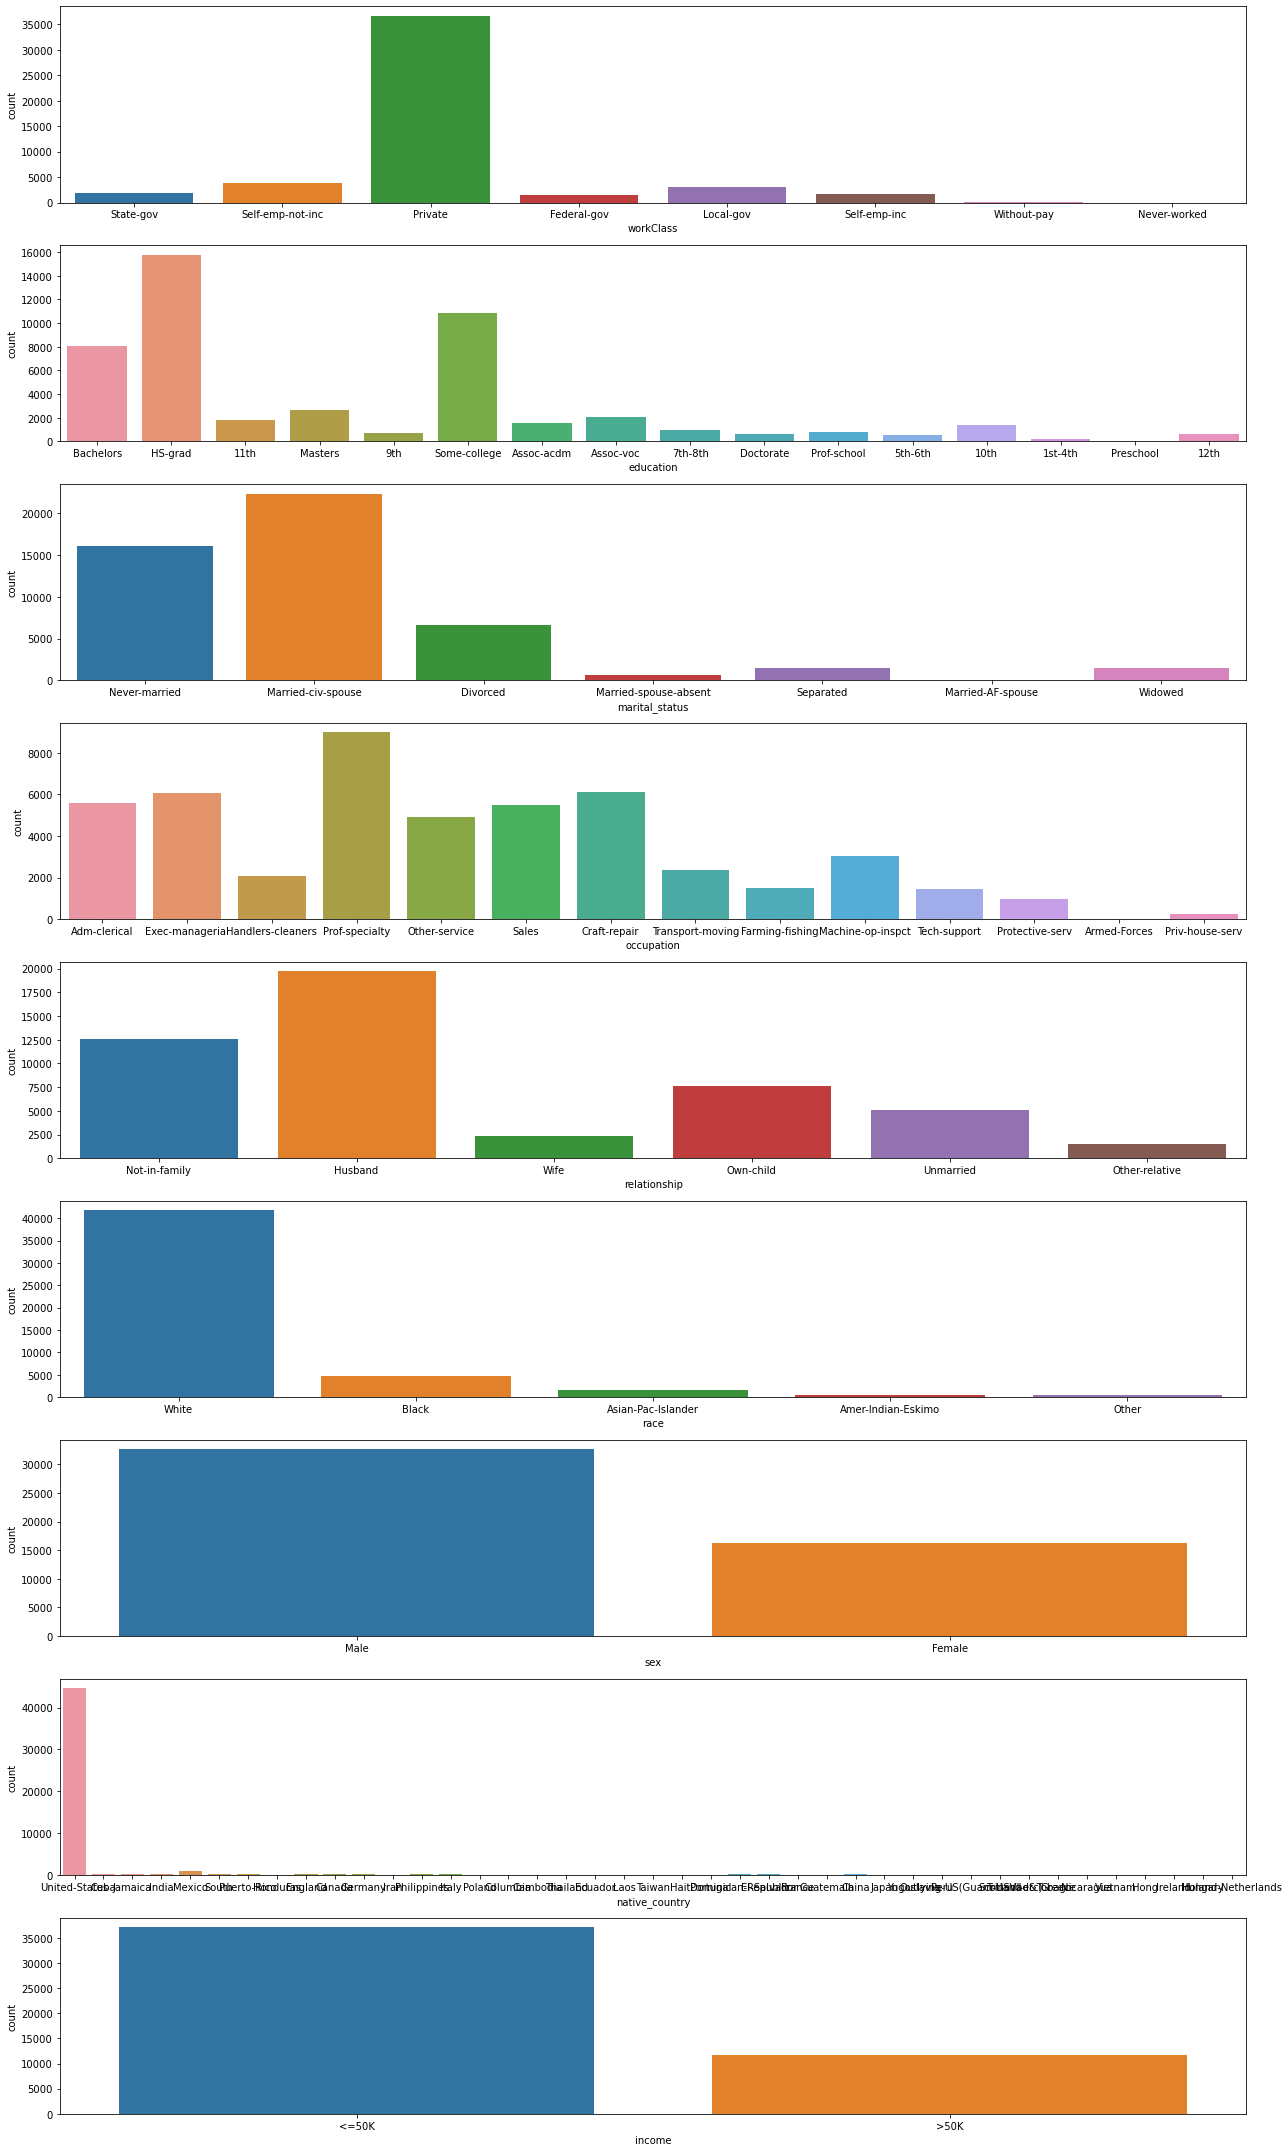

In [20]:
plt.figure(figsize=(18,30))
for i in range(0,len(categorical_column)):
    plt.subplot(9,1,i+1)
    sns.countplot(df[categorical_column[i]])
    plt.tight_layout()
    

# Visualizing the numerical column

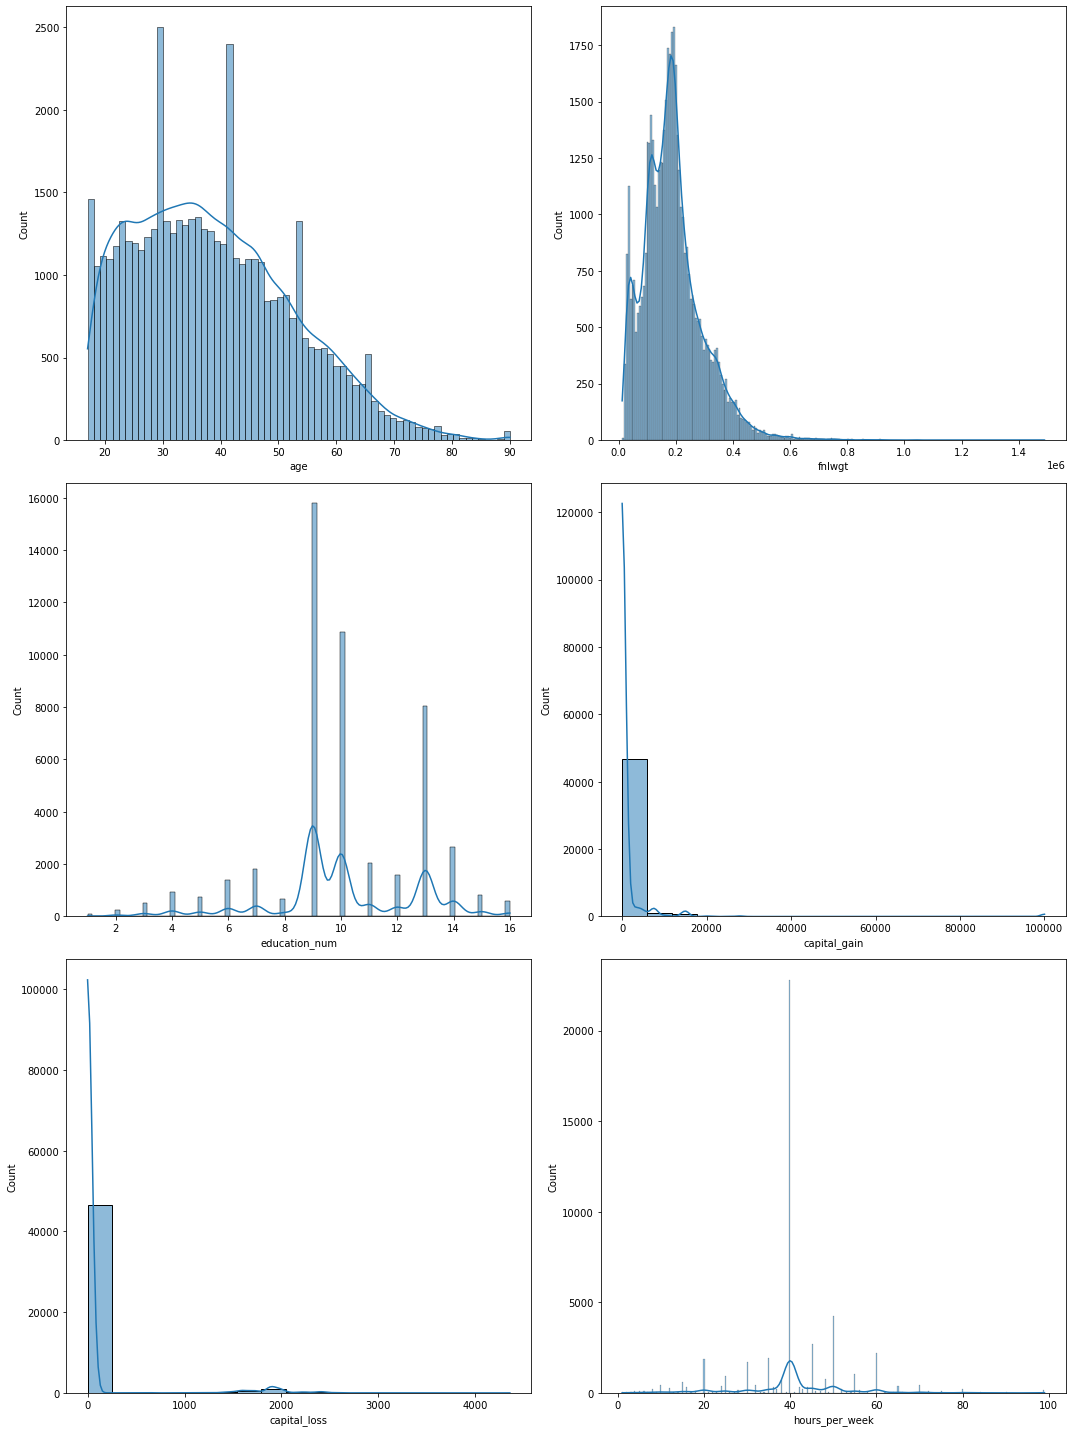

In [21]:
plt.figure(figsize=(15,20))
for i in range(0,len(numerical_column)):
    plt.subplot(3,2,i+1)
    sns.histplot(df[numerical_column[i]],kde=True)
    plt.tight_layout()

In [22]:
#Bivariate analysis

<AxesSubplot:xlabel='workClass', ylabel='count'>

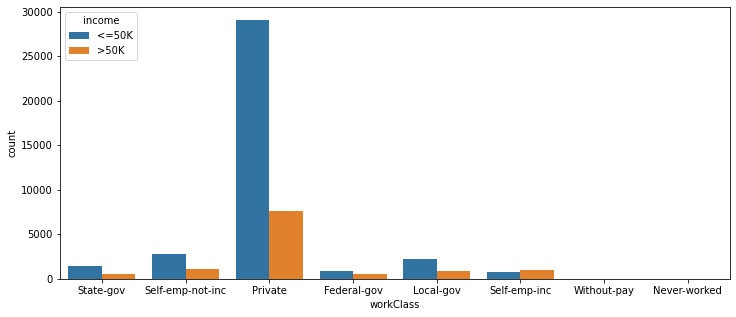

In [23]:
fig = plt.figure(figsize=(12,5))
sns.countplot(df.workClass, hue=df.income)

<AxesSubplot:xlabel='occupation', ylabel='count'>

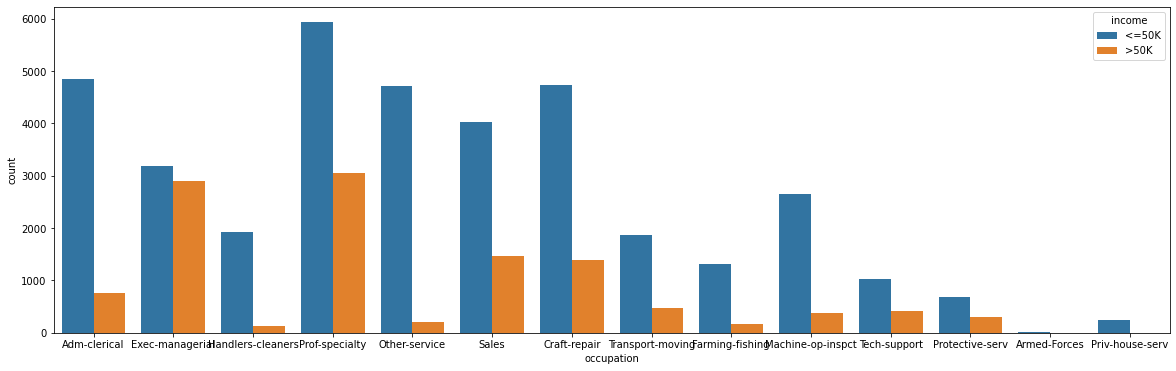

In [24]:
fig = plt.figure(figsize=(20,6))
sns.countplot(df.occupation, hue=df.income)

<AxesSubplot:xlabel='education', ylabel='count'>

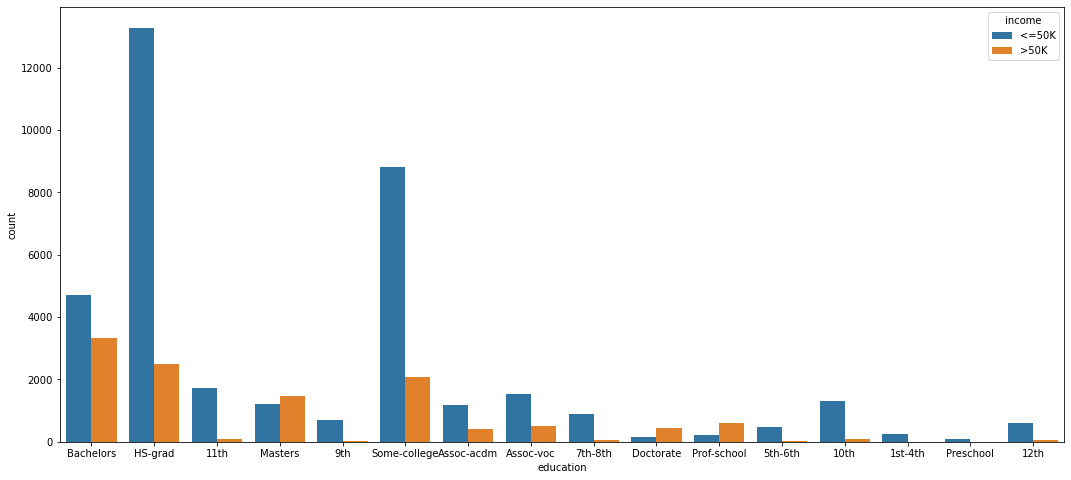

In [25]:
fig = plt.figure(figsize=(18,8))
sns.countplot(df['education'], hue=df.income)

<AxesSubplot:>

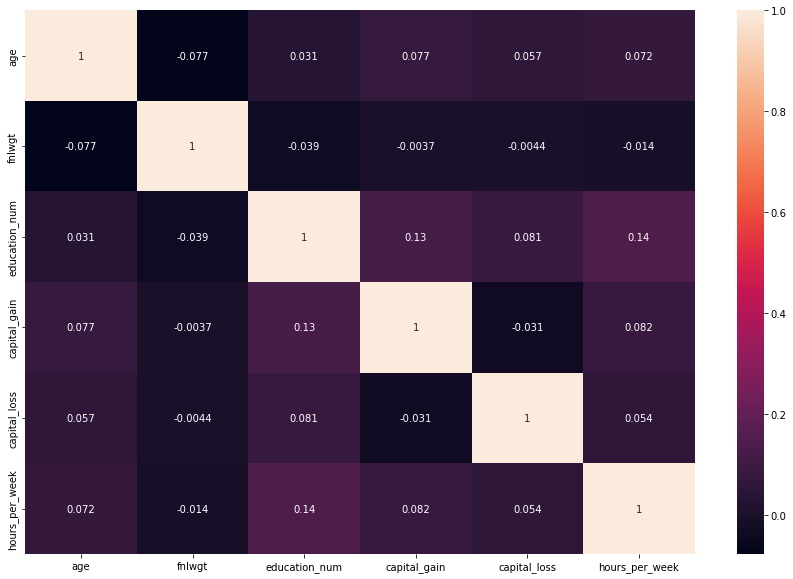

In [26]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True)

# Feature engineering



## Label encoding 


In [27]:
# Dropping education_num  column

df.drop(['education_num'],axis=1,inplace=True)
numerical_column.remove('education_num')

In [28]:
## Encoding categorical features

In [29]:
# one hot encoding categorical variables
categorical_column.remove('income')
df = pd.get_dummies(df, columns = categorical_column )


# Lable encoding target column

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['income']= le.fit_transform(df['income'].values)
    

In [30]:
df

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,income,workClass_Federal-gov,workClass_Local-gov,workClass_Never-worked,workClass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,0,0,36,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16277,64,321403,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16278,38,374983,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16279,44,83891,5455,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [31]:
X=df.drop(['income'],axis=1)
X

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workClass_Federal-gov,workClass_Local-gov,workClass_Never-worked,workClass_Private,workClass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,0,0,36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16277,64,321403,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16278,38,374983,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16279,44,83891,5455,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
y=df['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 48842, dtype: int32

## Train test split


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
X_train

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workClass_Federal-gov,workClass_Local-gov,workClass_Never-worked,workClass_Private,workClass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
9831,19,171578,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14623,32,281030,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
27411,43,75993,7688,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1288,37,37238,0,0,45,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7078,42,25240,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,35,200117,0,1887,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12171,21,90896,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5597,23,370057,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
860,18,216284,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train

array([[-1.426017  , -0.17747761, -0.14628528, ...,  0.30144881,
        -0.04122299, -0.02295131],
       [-0.48008861,  0.85451361, -0.14628528, ...,  0.30144881,
        -0.04122299, -0.02295131],
       [ 0.32031234, -1.0787209 ,  0.89659627, ...,  0.30144881,
        -0.04122299, -0.02295131],
       ...,
       [-1.13496211,  1.69392342, -0.14628528, ...,  0.30144881,
        -0.04122299, -0.02295131],
       [-1.49878073,  0.24404232, -0.14628528, ...,  0.30144881,
        -0.04122299, -0.02295131],
       [ 0.8296584 , -1.28362564, -0.14628528, ...,  0.30144881,
        -0.04122299, -0.02295131]])

In [36]:
# Splitting data 
X=df.drop(['income'],axis=1)
y=df['income']

# Model Training


In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [38]:
def performance(p,ytest,m,xtest,s):
    print(m)
    print('Accuracy',np.round(accuracy_score(p,ytest),4))    
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('Classification Report')
    print(classification_report(p,ytest))
    print('----------------------------------------------------------')

In [39]:
models=[LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

In [40]:
def modeltraining(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
    for i in models:
        model=i
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        score=cross_val_score(model,X,y,cv=10)
        performance(y_pred,y_test,model,X_test,score)

In [41]:
modeltraining(X,y)

LogisticRegression()
Accuracy 0.817
Mean of Cross Validation Score 0.7977
AUC_ROC Score 0.8448
Confusion Matrix
[[8670 1657]
 [ 578 1306]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     10327
           1       0.44      0.69      0.54      1884

    accuracy                           0.82     12211
   macro avg       0.69      0.77      0.71     12211
weighted avg       0.86      0.82      0.83     12211

----------------------------------------------------------
DecisionTreeClassifier()
Accuracy 0.812
Mean of Cross Validation Score 0.8146
AUC_ROC Score 0.7458
Confusion Matrix
[[8089 1137]
 [1159 1826]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9226
           1       0.62      0.61      0.61      2985

    accuracy                           0.81     12211
   macro avg       0.75      0.74      0.74     12211
weighted avg    

## SVM kernel hyperparameter tuning 


In [42]:
from sklearn.svm import SVC
sv=SVC()
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1,10,30,50,100,500,1000], 
              'gamma': [0.01, 0.001, 0.0001,0.00001,0.000001],
              'kernel': ['sigmoid']}
grid_search = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.834 total time=  48.2s
[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.826 total time=  48.3s
[CV 3/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.831 total time=  47.1s
[CV 4/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.824 total time=  49.3s
[CV 5/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.821 total time=  49.3s
[CV 1/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.845 total time=  47.9s
[CV 2/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.845 total time=  47.4s
[CV 3/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.847 total time=  47.7s
[CV 4/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.843 total time=  47.3s
[CV 5/5] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.843 total time=  47.2s
[CV 1/5] END .C=1, gamma=0.0001, kernel=sigmoid;, score=0.813 total time=  55.1s
[CV 2/5] END .C=1, gamma=0.0001, kernel=sigmoid

[CV 2/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.800 total time=  40.0s
[CV 3/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.806 total time=  40.3s
[CV 4/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.801 total time=  43.1s
[CV 5/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.798 total time=  34.1s
[CV 1/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.844 total time=  53.9s
[CV 2/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.845 total time=  54.0s
[CV 3/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.847 total time=  52.7s
[CV 4/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.842 total time=  54.0s
[CV 5/5] END C=100, gamma=0.001, kernel=sigmoid;, score=0.845 total time=  53.7s
[CV 1/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.851 total time=  45.6s
[CV 2/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.851 total time=  46.7s
[CV 3/5] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.849 total time=  46.3s
[CV 4/5] END C=100, gamma

{'C': 100, 'gamma': 0.0001, 'kernel': 'sigmoid'}

In [43]:
gr_pred=grid_search.predict(X_test)
acc=accuracy_score(gr_pred,y_test)
acc

0.8469937896676448